# <a id='the top'>Monte carlo simulation of 2D Ising model</a>

In this notebook we will try to understand the physics of <a href='https://en.wikipedia.org/wiki/Square_lattice_Ising_model'>two dimensional Ising model</a> numerically. The Hamiltonian is given by a claasical variable called spin $s_i\in\{\pm1\}$, these degrees of freedom sits on the vertex of the square lattice.

$$ \mathcal{H}=-\sum_{i,j}s_is_j $$

We will try to find the ground state configuration of this system using the Markov chain monte carlo (<a href='https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo'>MCMC</a>) method. Notice that this problem has the complexity of $2^{N^2}$, since in a $(N\times N)$ lattice there are $N^2$ spins, and every spins has a two dimentional Hilbert space. 

Here we will show that to find the ground state we don't need to look at the full Hilbert space. For a finite temperature, we will let the system evolve it's energy landscape using the monte carlo dynamics, and at the end we will see which state the system is settling into, that will be the best candidate for the ground state (GS).

Of course this problem has a trivial ground state, actually a two fold degenerate GS with all the $s_{i}=\pm 1$. Still this problem is iteresting on its own, since there is a prediction of the critical temperature ($T_c\sim 2.27$), using <a href='https://en.wikipedia.org/wiki/Kramers%E2%80%93Wannier_duality'>Krammers-wannier duality</a>.

Also the problem of Ising model is usefull to study numerous complex problems starting from a <a href='https://en.wikipedia.org/wiki/Ising_model#Applications'>physical system</a> to a <a href='https://aapt.scitation.org/doi/abs/10.1119/1.2779882?journalCode=ajp'>socio economic</a> one.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initial_state(N):
    return 2*np.random.randint(2,size=(N,N))-1

def mc_move(state,T):
    '''given a current state, take decission to go to the next state'''
    N=state.shape[0]
    a=np.random.randint(N)
    b=np.random.randint(N)
    s=state[a,b]
    #print(state,a,b)
    # adding all the spins in the neighbour state
    field = state[(a+1)%N,b] + state[a,(b+1)%N] + state[(a-1)%N,b] + state[a,(b-1)%N]
    # change in enrgy if we flip the spin at (a,b)
    del_energy=2*s*field
    if del_energy<0:
        state[a,b]=-s
    elif np.random.rand()<np.exp(-del_energy*(1./T)):
        state[a,b]=-s
    return state

def calculate_energy(state):
    '''calculate energy of a state'''
    energy=0
    N=state.shape[0]
    for i in range(N):
        for j in range(N):
            increament = state[i,j]*(state[(i+1)%N,j] + state[i,(j+1)%N])
            energy = energy + increament
    return -energy

def calculate_magnet(state):
    '''Magnetization of a given configuration'''
    N=state.shape[0]
    magnetization = np.sum(state)
    return magnetization

In [3]:
data=32
temp_arr=np.linspace(1,4,32)
N=8
mc_equ=2**14                     # no of iteration to reach the groud state, i.e. equilibration time
mc_iter=2*16                    # no of iteration to calcualte the expectation values one gs is reached

energy, magnet, spec_heat, suscept = np.zeros(data), np.zeros(data), np.zeros(data), np.zeros(data)
loop=16

In [4]:
np.random.seed(8003)

for i,T in enumerate(temp_arr):
    e,m=0.,0.
    state = initial_state(N)
    #print(T)
    for k in range(loop):
        for j in range(mc_equ):
            mc_move(state,T)
        #
        for j in range(mc_iter):
            mc_move(state,T)
            en = calculate_energy(state)
            mag = calculate_magnet(state)
            #
            e += en
            m += mag
    #    
    energy[i] = e*(1./(2*N*N*loop*mc_iter))
    magnet[i] = m*(1./(N*N*loop*mc_iter))

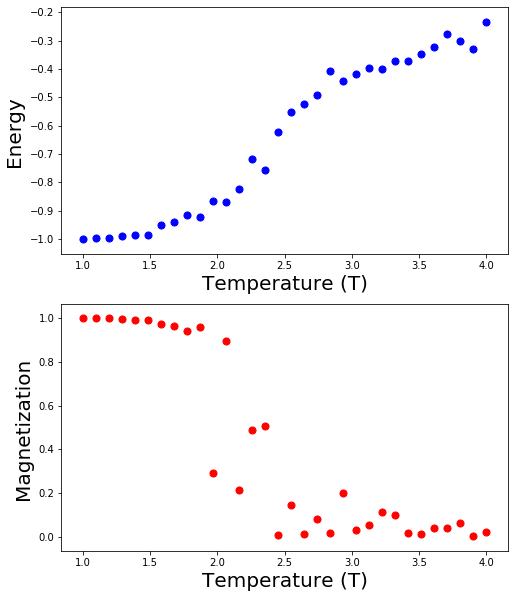

In [5]:
f = plt.figure(figsize=(8, 10)); # plot the calculated values    

sp =  f.add_subplot(2, 1, 1 );
plt.scatter(temp_arr, energy, s=50, marker='o', c='b')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(2, 1, 2 );
plt.scatter(temp_arr, abs(magnet), s=50, marker='o', c='r')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

In the low temperature it is quite evident the system is settling to low energy state, with uniform magnetization density. While in the high temperature, the energy increases and magnetization decreases, signaling that the system is becomeing disorder. The analytical value of the critical temperature is $T\sim 2.27 K$.

# Now we will visualize the simulation

In [6]:
from __future__ import division
%matplotlib inline
# Simulating the Ising model
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class Ising():
    ''' Simulating the Ising model '''    
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''          
        a = np.random.randint(0, N)
        b = np.random.randint(0, N)
        s =  config[a, b]
        nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
        cost = 2*s*nb
        if cost < 0:
            s *= -1
        elif rand() < np.exp(-cost*beta):
            s *= -1
        config[a, b] = s
        return config
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        N, temp     = 64, .4        # choosing a ordering temperature
        config = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        
        msrmnt = 2**20 + 1
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0/temp)
            if i == 2*0:       self.configPlot(f, config, i, N, 1);
            if i == 2*12:       self.configPlot(f, config, i, N, 2);
            if i == 2**14:      self.configPlot(f, config, i, N, 3);
            if i == 2**16:     self.configPlot(f, config, i, N, 4);
            if i == 2**18:     self.configPlot(f, config, i, N, 5);
            if i == 2**20:     self.configPlot(f, config, i, N, 6);
                 
                    
    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()

/Users/animeshnanda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


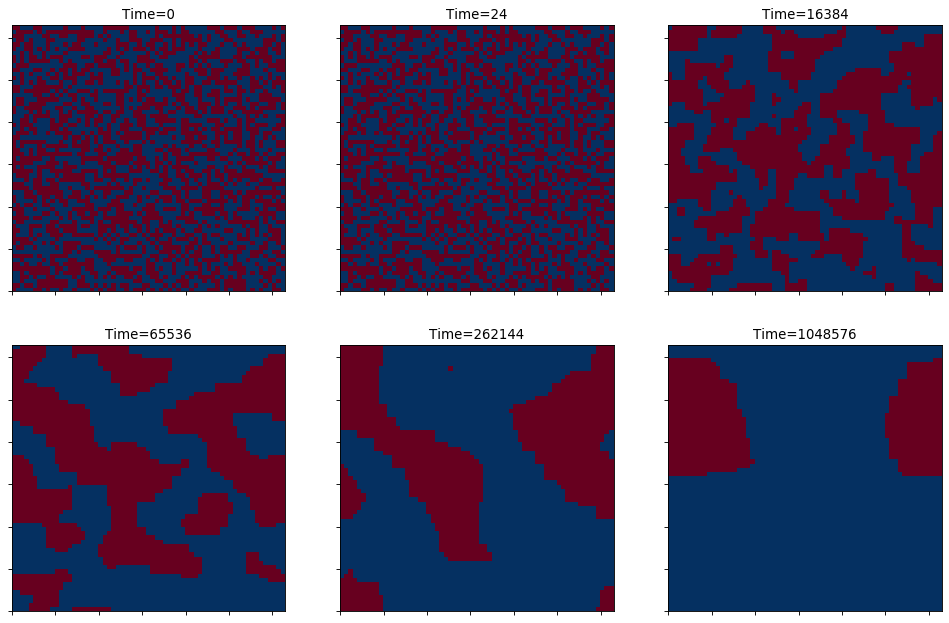

In [7]:
np.random.seed(2389)
Ising().simulate()

Interestingly, this is a $2^{64\times64}$ dimesional Hilbert space, but only with the $2^{20}$ steps we are pretty colse to one of the ground state, this is the power of MCMC simulations. <b>Run time: 5 mins</b>